In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pandas as pd
from math import pi

In [2]:
DATA_DIR = Path('data/org')

In [3]:
CSV_FILENAMES = sorted(list(DATA_DIR.glob('*.csv')))

In [4]:
CSV_FILES = [pd.read_csv(f) for f in CSV_FILENAMES]

In [5]:
CSV_FILES[0].columns

Index(['timestamp', 'biosignal_0', 'biosignal_1', 'biosignal_2', 'biosignal_3',
       'biosignal_4', 'biosignal_5', 'biosignal_6', 'biosignal_7',
       'acceleration_x', 'acceleration_y', 'acceleration_z', 'angular_vec_x',
       'angular_vec_y', 'angular_vec_z', 'magnetic_x', 'magnetic_y',
       'magnetic_z', 'input_orientation_x', 'input_orientation_y',
       'input_orientation_z', 'input_orientation_w', 'input_orientation_yaw',
       'input_orientation_pitch', 'input_orientation_roll',
       'input_projection_left', 'input_projection_top',
       'input_projection_right', 'input_projection_bottom', 'prediction_time',
       'predicted_orientation_x', 'predicted_orientation_y',
       'predicted_orientation_z', 'predicted_orientation_w',
       'predicted_orientation_yaw', 'predicted_orientation_pitch',
       'predicted_orientation_roll', 'predicted_projection_left',
       'predicted_projection_top', 'predicted_projection_right',
       'predicted_projection_bottom'],
      d

In [6]:
COLUMNS = ['timestamp', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'input_orientation_yaw', 'input_orientation_pitch', 'input_orientation_roll']

In [7]:
CSV_FILES = [csv[COLUMNS] for csv in CSV_FILES]

In [8]:
for csv in CSV_FILES:
    csv.timestamp /= 705600000
    csv.timestamp -= csv.timestamp[0]

In [9]:
for csv in CSV_FILES:
    csv.input_orientation_yaw *= 180 / pi
    csv.input_orientation_pitch *= 180 / pi
    csv.input_orientation_roll *= 180 / pi

In [24]:
csv = CSV_FILES[1]

In [25]:
dyaw = csv.input_orientation_yaw[2001:].to_numpy() - csv.input_orientation_yaw[2000:-1].to_numpy()

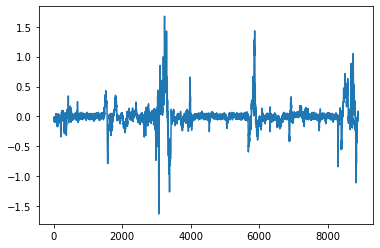

In [26]:
plt.plot(dyaw)

In [27]:
ddyaw = dyaw[1:] - dyaw[:-1]

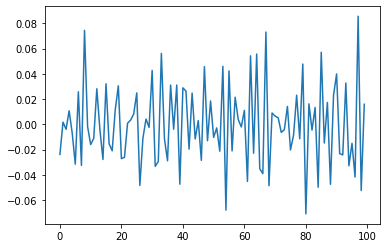

In [31]:
plt.plot(ddyaw[:100])

In [36]:
dddyaw = ddyaw[1:] - ddyaw[:-1]

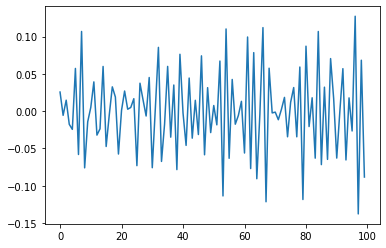

In [38]:
plt.plot(dddyaw[:100])

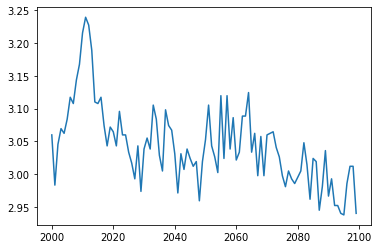

In [35]:
plt.plot(csv.acceleration_z[2000:2100])